Setup

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import nltk
import string
import re
from nltk import word_tokenize, FreqDist,regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.cluster import DBSCAN, OPTICS,MeanShift
from scipy.cluster.hierarchy import dendrogram,linkage

In [5]:
from bs4 import BeautifulSoup as bs
from itertools import takewhile
import requests
import json

In [44]:
%run Functionality.py

EDA

Stock Price Correlations

Dataframes for Correlations of Daily Changes (Absolute & Relative to Benchmark)

In [7]:
daily_prices,abs_data,rel_data=collect_market_data(Universe.index)

/Users/george/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FYBR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Quick Look @ Correlations Between Daily Changes & Daily Changes relative to the S&P.

In [ ]:
abs_data[1]

In [ ]:
rel_data[0]

Look @ Some Heatmaps of Correlations

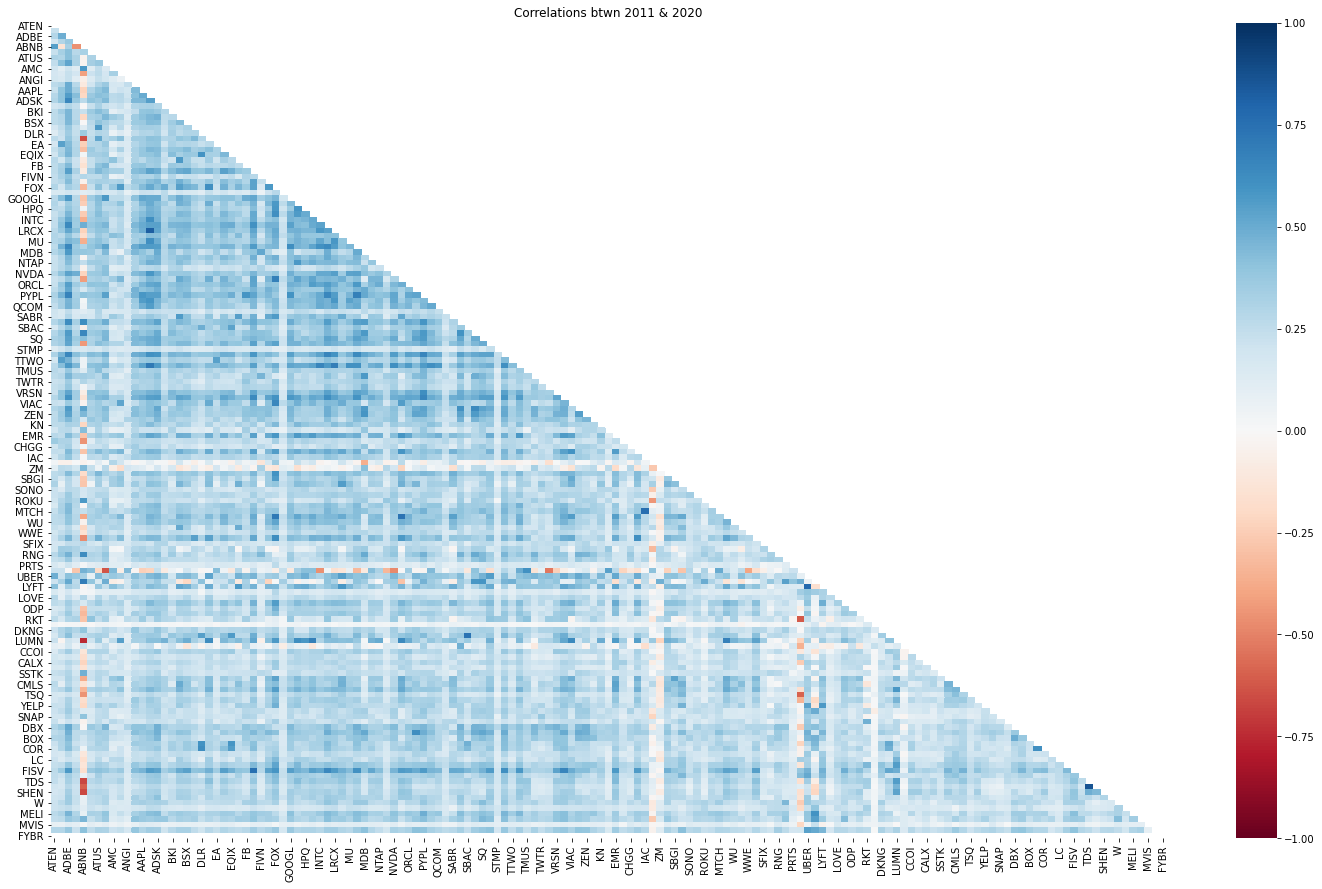

In [34]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Correlations btwn 2011 & 2020')
mtrx=abs_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.savefig(image_path+'Corr Matrix.pdf',
            orientation='landscape',
            pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

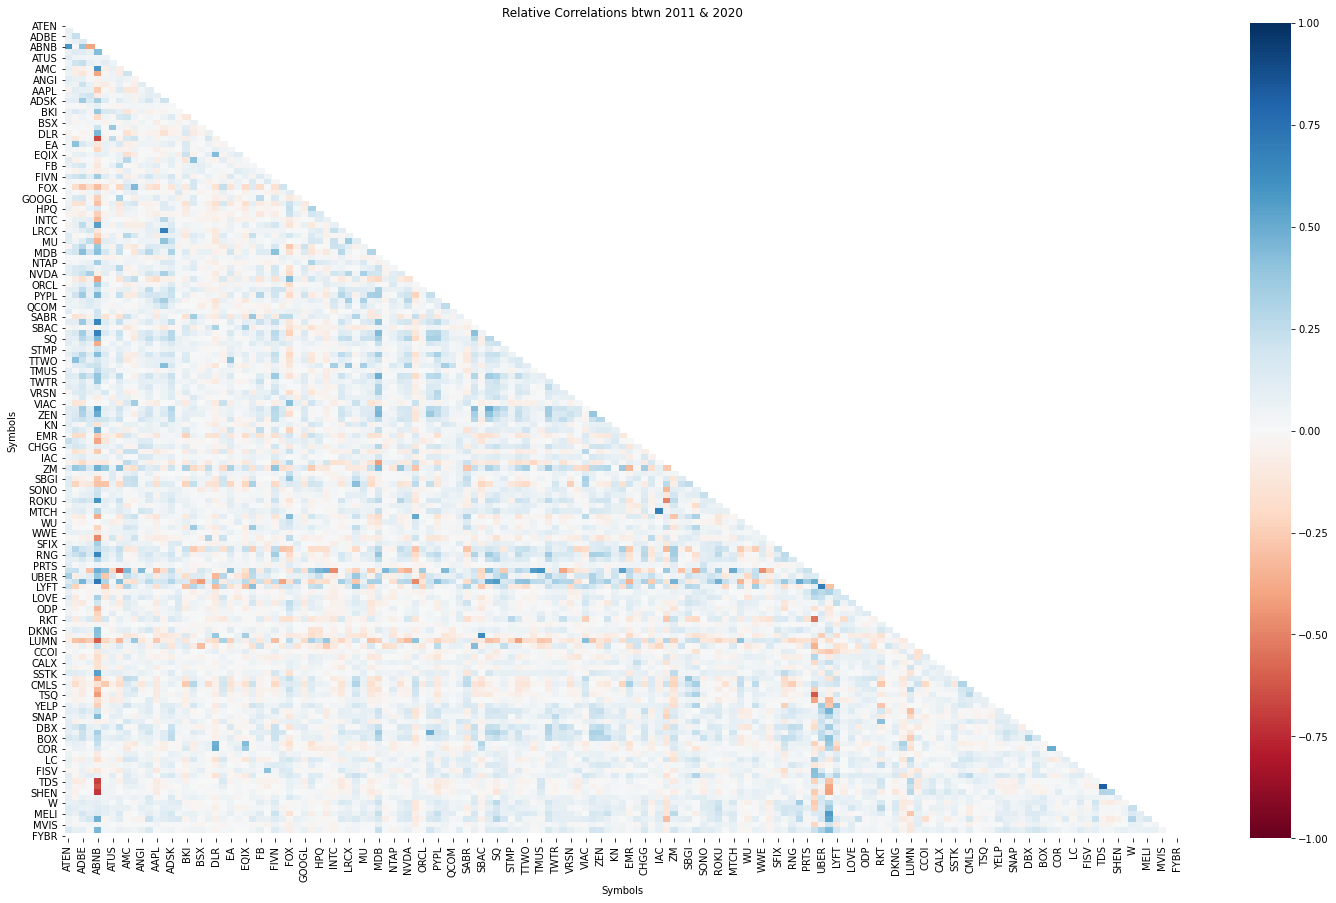

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Relative Correlations btwn 2011 & 2020')
mtrx=rel_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
fig.savefig(image_path+'Corr Matrix_Relative.pdf',
            orientation='landscape',pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

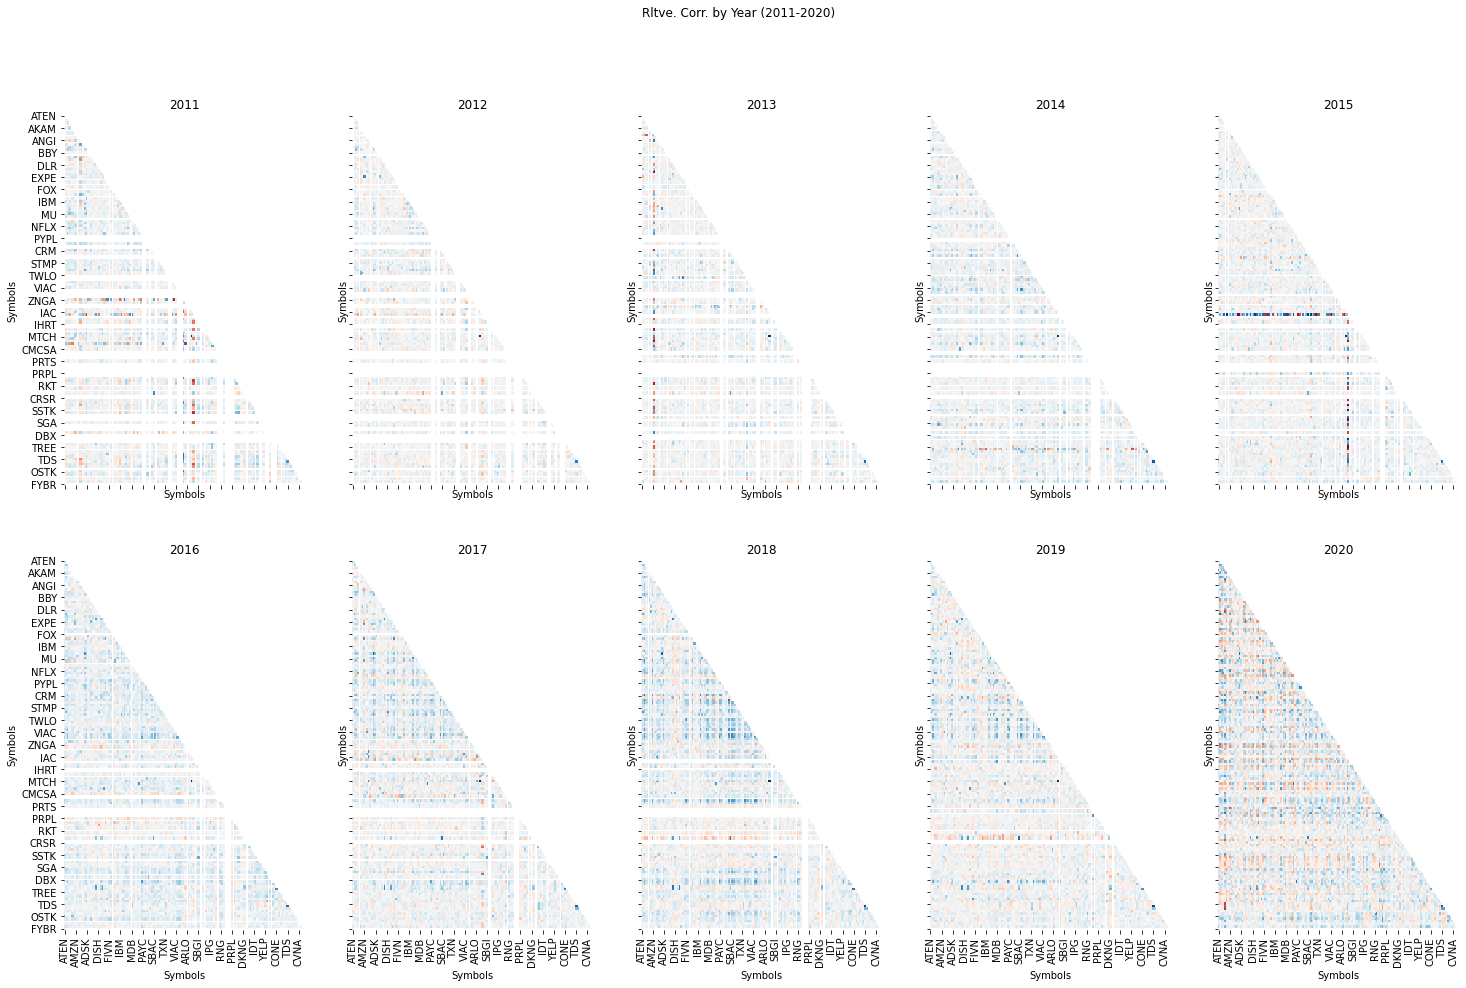

In [35]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(25,15),sharex=True,sharey=True,)
fig.suptitle('Rltve. Corr. by Year (2011-2020)')
axes=ax.reshape(-1)
i=0
for y in coverage:
    a=axes[i]
    a.set_title(y)
    corr_mat=rel_data[2].xs(y+'-12-31')
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,ax=a,vmin=-1,vmax=1,cbar=False,cmap='RdBu')
    i+=1
fig.savefig(image_path+'Annual Corr Matrices_Relative.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Given the number of time series in this dataset, it is tough to make any inferences with this visualization.  Let's look @ a different visualization technique...

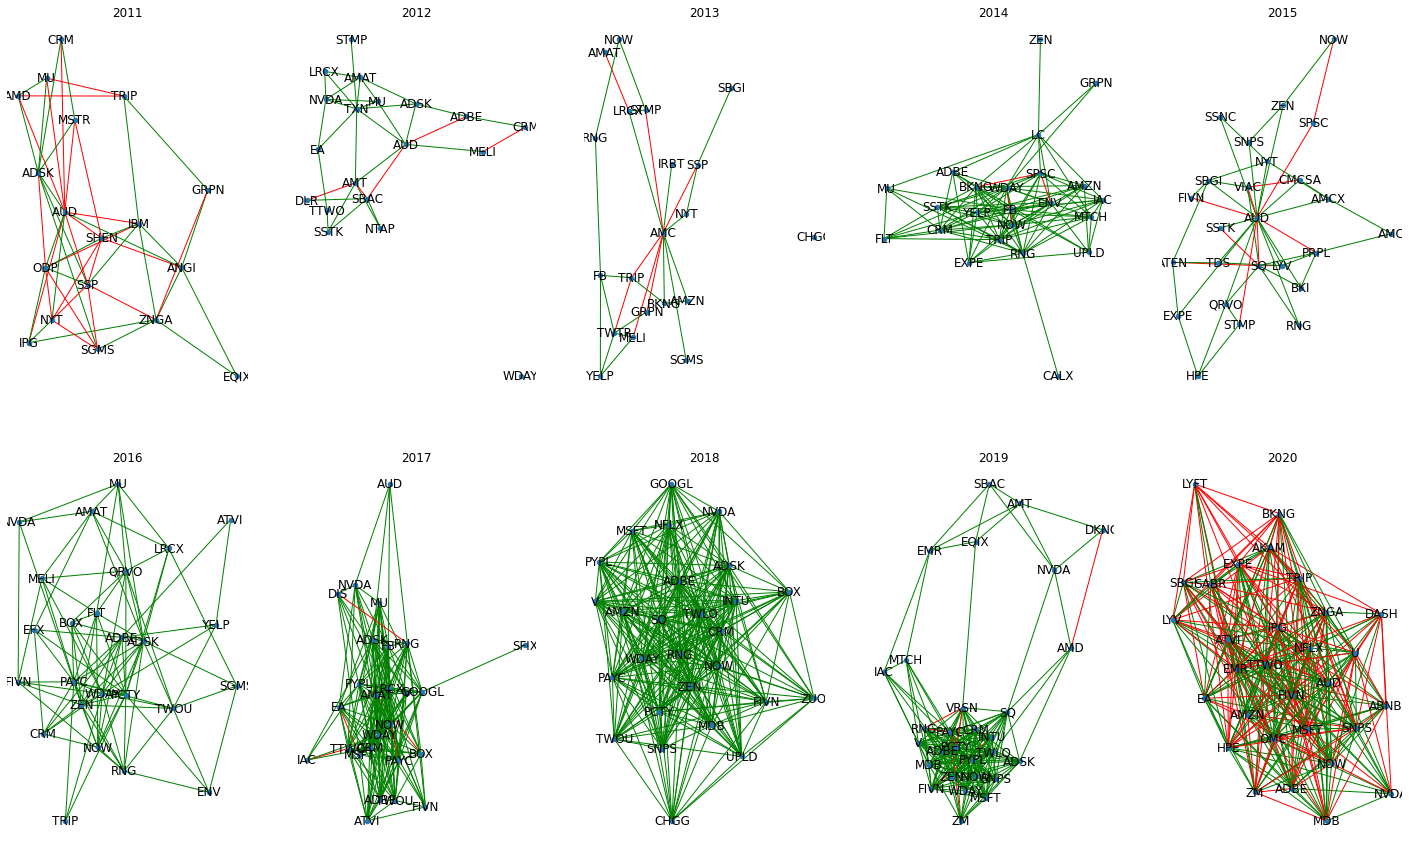

In [39]:
fig,axes=plt.subplots(ncols=5,nrows=2,figsize=(25,15))
axes=axes.reshape(-1)
matrix=rel_data[2]
i=0
for yr in coverage:
    Sigma=matrix.xs(yr+'-12-31')
    Tops=filter_decile(Sigma,0.8)
    G=graphx.Graph()
    G.add_nodes_from(Tops.index)
    colors=[]
    a=axes[i]
    a.set_title(yr)
    for tick_a in G.nodes:
        for tick_b in G.nodes:
            p=Sigma[tick_a][tick_b]
            if((tick_a!=tick_b) and abs(p)>0.25):
                clr='green' if p>0 else 'red'
                colors.append(clr)
                G.add_edge(tick_a,tick_b,color=clr,weight=abs(p))
            else:
                pass
                #print(tick_a,tick_b)
    graphx.draw(G,with_labels=True,edge_color=colors,node_size=20,ax=a)
    i+=1
fig.savefig(image_path+'Annual Universe Structure.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Moving on to the text...

In [ ]:
for tick in Filed.index:
    visualize_stock(tick)

/Users/george/Dropbox/Mac/Desktop/Projects/Capstone/Langague-Analysis/Code/Functionality.py:551: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.set_title(ticker+':  All Risk Disclosures')
/Users/george/Dropbox/Mac/Desktop/Projects/Capstone/Langague-Analysis/Code/Functionality.py:572: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  nrows=rows,
